In [102]:
using CSV, DataFrames
using Plots
using Distributions, Statistics
using Optim, NLopt
using ForwardDiff

# Time Series Analysis

**Definition (Stochastic process)**
A stochastic process
is a sequence of random variables, indexed by time: $\{Y_{t}\}_{t=-\infty}^{\infty}$

**Definition (Times series)**
A time series is \textbf{one}
observation of a stochastic process, over a specific interval: $\{y_{t}\}_{t=1}^{n}$.

So a time series is a sample of size $n$ from a stochastic process.
It's important to keep in mind that conceptually, one could draw another
sample, and that the values would be different.


**Definition (Autocovariance)**
The $j^{th}$ autocovariance of a stochastic
process is $\gamma_{jt}=\mathcal{E}(y_{t}-\mu_{t})(y_{t-j}-\mu_{t-j})$
where $\mu_{t}=\mathcal{E}\left(y_{t}\right).$

**Definition (Covariance (weak) stationarity)**
A stochastic process is covariance
stationary if it has time constant mean and autocovariances of all
orders: 

\begin{eqnarray*}
\mu_{t} & =\mu, & \forall t\\
\gamma_{jt} & =\gamma_{j}, & \forall t
\end{eqnarray*}


As we've seen, this implies that $\gamma_{j}=\gamma_{-j}:$ the autocovariances
depend only one the interval between observations, but not the time
of the observations.

**Definition (Strong stationarity)**
A stochastic process is strongly stationary
if the joint distribution of an arbitrary collection of the $\left\{ Y_{t}\right\} $,
e.g., $(Y_{t-j},Y_{t-k},...,Y_{t},...,Y_{t+l},Y_{t+m}\}$, doesn't
depend on $t.$

Since moments are determined by the distribution, strong stationarity$\Rightarrow$weak
stationarity.


How can we estimate the mean of $Y_{t}?$

The time series
is one sample from the stochastic process, and each of the random
variables over the sample interval is sampled only once. One could
think of $M$ repeated samples from the stoch. proc., e.g., $\left\{ y_{tm}\right\} _{m=1}^{M}$
By a LLN, we would expect that 
$$
\frac{1}{M}\sum_{m=1}^{M}y_{tm}\overset{p}{\rightarrow}\mathcal{E}(Y_{t})
$$
as $M$ gets large. The problem is, we have only one sample to work
with, since we can't go back in time and collect another. How can
$\mathcal{E}(Y_{t})$ be estimated then? It turns out that **ergodicity**
is the needed property.

**Definition (Ergodicity)**
A stationary stochastic process is ergodic (for
the mean) if the time average converges to the mean
\begin{equation}
\frac{1}{n}\sum_{t=1}^{n}y_{t}\overset{p}{\rightarrow}\mu
\end{equation}

A sufficient condition for ergodicity is that the autocovariances
be absolutely summable: 
$$
\sum_{j=0}^{\infty}|\gamma_{j}|<\infty
$$

This implies that the autocovariances die off, so that the $y_{t}$
are not so strongly dependent that they don't satisfy a LLN.

**Definition (Autocorrelation)**
The $j^{th}$ autocorrelation, $\rho_{j}$ is
just the $j^{th}$ autocovariance divided by the variance: 

\begin{equation}
\rho_{j}=\frac{\gamma_{j}}{\gamma_{0}}
\end{equation}

$\,$
**Definition (White noise)**
White noise is just the time series literature term
for a classical error. $\epsilon_{t}$ is white noise if i) $\mathcal{E}(\epsilon_{t})=0,\forall t,$
ii) $V(\epsilon_{t})=\sigma^{2},\forall t$ and iii) $\epsilon_{t}$
and $\epsilon_{s}$ are independent, $t\neq s.$ Gaussian white noise
just adds a normality assumption.


## AR(p)

An AR(p) process can be represented as 
$$
y_{t}=c+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}
$$
where $\epsilon_{t}$ is white noise. This is just a linear regression
model, and assuming stationarity, we can estimate the parameters by
OLS. 

What is needed for stationarity?

The dynamic behavior of an AR(p) process can be studied by writing
this $p^{th}$ order difference equation as a vector first order difference
equation (this is known as the companion form): 
$$
\left[\begin{array}{l}
y_{t}\\
y_{t-1}\\
\vdots\\
y_{t-p+1}
\end{array}\right]=\left[\begin{array}{l}
c\\
0\\
\vdots\\
0
\end{array}\right]+\left[\begin{array}{lllll}
\phi_{1} & \phi_{2} & \cdots &  & \phi_{p}\\
1 & 0 & 0 &  & 0\\
0 & 1 & 0 & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & 0\cdots\\
0 & \cdots & 0 & 1 & 0
\end{array}\right]\left[\begin{array}{l}
y_{t-1}\\
y_{t-2}\\
\vdots\\
y_{t-p}
\end{array}\right]+\left[\begin{array}{l}
\varepsilon_{t}\\
0\\
\vdots\\
0
\end{array}\right]
$$
 or 
$$
Y_{t}=C+FY_{t-1}+E_{t}
$$

With this, we can recursively work forward in time: 
\begin{eqnarray*}
Y_{t+1} & = & C+FY_{t}+E_{t+1}\\
 & = & C+F\left(C+FY_{t-1}+E_{t}\right)+E_{t+1}\\
 & = & C+FC+F^{2}Y_{t-1}+FE_{t}+E_{t+1}
\end{eqnarray*}
 and 
\begin{eqnarray*}
Y_{t+2} & = & C+FY_{t+1}+E_{t+2}\\
 & = & C+F\left(C+FC+F^{2}Y_{t-1}+FE_{t}+E_{t+1}\right)+E_{t+2}\\
 & = & C+FC+F^{2}C+F^{3}Y_{t-1}+F^{2}E_{t}+FE_{t+1}+E_{t+2}
\end{eqnarray*}
 or in general 
$$
Y_{t+j}=C+FC+\cdots+F^{j}C+F^{j+1}Y_{t-1}+F^{j}E_{t}+F^{j-1}E_{t+1}+\cdots+FE_{t+j-1}+E_{t+j}
$$

Consider the impact of a shock in period $t$ on $y_{t+j}.$
This is simply 
$$
\frac{\partial Y_{t+j}}{\partial E_{t}^{\prime}}_{(1,1)}=F_{(1,1)}^{j}
$$
 If the system is to be stationary, then as we move forward in time
this impact must die off. Otherwise a shock causes a permanent change
in the mean of $y_{t}.$ Therefore, stationarity requires that 
$$
\lim_{j\rightarrow\infty}F_{(1,1)}^{j}=0
$$
Save this result, we'll need it in a minute.

Consider the eigenvalues of the matrix $F.$ These are the $\lambda$
such that 
$$
|F-\lambda I_{P}|=0
$$
 The determinant here can be expressed as a polynomial. For example,
for $p=1,$ the matrix $F$ is simply 
$$
F=\phi_{1}
$$
 so 
$$
|\phi_{1}-\lambda|=0
$$
 can be written as 
$$
\phi_{1}-\lambda=0
$$
 When $p=2,$ the matrix $F$ is 
$$
F=\left[\begin{array}{ll}
\phi_{1} & \phi_{2}\\
1 & 0
\end{array}\right]
$$
 so 
$$
F-\lambda I_{P}=\left[\begin{array}{ll}
\phi_{1}-\lambda & \phi_{2}\\
1 & -\lambda
\end{array}\right]
$$
 and 
$$
|F-\lambda I_{P}|=\lambda^{2}-\lambda\phi_{1}-\phi_{2}
$$
 So the eigenvalues are the roots of the polynomial 
$$
\lambda^{2}-\lambda\phi_{1}-\phi_{2}
$$
 which can be found using the quadratic equation. This generalizes.
For a $p^{th}$ order AR process, the eigenvalues are the roots of
$$
\lambda^{p}-\lambda^{p-1}\phi_{1}-\lambda^{p-2}\phi_{2}-\cdots-\lambda\phi_{p-1}-\phi_{p}=0
$$


Supposing that all of the roots of this polynomial are distinct,
then the matrix $F$ can be factored as, using Eigen decomposition,}
$$
F=T\Lambda T^{-1}
$$
 where $T$ is the matrix which has as its columns the eigenvectors
of $F,$ and $\Lambda$ is a diagonal matrix with the eigenvalues
on the main diagonal. Using this decomposition, we can write 
$$
F^{j}=\left(T\Lambda T^{-1}\right)\left(T\Lambda T^{-1}\right)\cdots\left(T\Lambda T^{-1}\right)
$$
 where $T\Lambda T^{-1}$ is repeated $j$ times. This gives 
$$
F^{j}=T\Lambda^{j}T^{-1}
$$
 and 
$$
\Lambda^{j}=\left[\begin{array}{llll}
\lambda_{1}^{j} & 0 &  & 0\\
0 & \lambda_{2}^{j}\\
 &  & \ddots\\
0 &  &  & \lambda_{p}^{j}
\end{array}\right]
$$

Supposing that the $\lambda_{i}$ $i=1,2,...,p$ are all
real valued, it is clear that 
$$
\lim_{j\rightarrow\infty}F_{(1,1)}^{j}=0
$$
 requires that 
$$
|\lambda_{i}|<1,i=1,2,...,p
$$
 e.g., the eigenvalues must be less than one in absolute value.
- It may be the case that some eigenvalues are complex-valued. The previous
result generalizes to the requirement that the eigenvalues be less
than one in **modulus**, where the modulus of a complex number
$a+bi$ is 
$$
mod(a+bi)=\sqrt{a^{2}+b^{2}}
$$
 This leads to the famous statement that "stationarity requires
the roots of the determinantal polynomial to lie inside the complex
unit circle."

- When there are roots on \ the unit circle (unit roots) or outside
the unit circle, we leave the world of stationary processes.
- Dynamic multipliers: $\partial y_{t+j}/\partial\varepsilon_{t}=F_{(1,1)}^{j}$
is a \emph{dynamic multiplier} or an **impulse-response** function.
Real eigenvalues lead to steady movements, whereas complex eigenvalues
lead to oscillatory behavior. Of course, when there are multiple eigenvalues
the overall effect can be a mixture.

### Moments of AR(p)  process


The AR(p) process is 
$$
y_{t}=c+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}
$$
 Assuming stationarity, $\mathcal{E}(y_{t})=\mu,\forall t,$ so 
$$
\mu=c+\phi_{1}\mu+\phi_{2}\mu+...+\phi_{p}\mu
$$
 so 
$$
\mu=\frac{c}{1-\phi_{1}-\phi_{2}-...-\phi_{p}}
$$
 and 
$$
c=\mu-\phi_{1}\mu-...-\phi_{p}\mu
$$
 so 
\begin{eqnarray*}
y_{t}-\mu & = & \mu-\phi_{1}\mu-...-\phi_{p}\mu+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}-\mu\\
 & = & \phi_{1}(y_{t-1}-\mu)+\phi_{2}(y_{t-2}-\mu)+...+\phi_{p}(y_{t-p}-\mu)+\varepsilon_{t}
\end{eqnarray*}


With this, the second moments are easy to find: The variance
is 
$$
\gamma_{0}=\phi_{1}\gamma_{1}+\phi_{2}\gamma_{2}+...+\phi_{p}\gamma_{p}+\sigma^{2}
$$
 The autocovariances of orders $j\geq1$ follow the rule 
\begin{eqnarray*}
\gamma_{j} & = & \mathcal{E}\left[\left(y_{t}-\mu\right)\left(y_{t-j}-\mu)\right)\right]\\
 & = & \mathcal{E}\left[\left(\phi_{1}(y_{t-1}-\mu)+\phi_{2}(y_{t-2}-\mu)+...+\phi_{p}(y_{t-p}-\mu)+\varepsilon_{t}\right)\left(y_{t-j}-\mu\right)\right]\\
 & = & \phi_{1}\gamma_{j-1}+\phi_{2}\gamma_{j-2}+...+\phi_{p}\gamma_{j-p}
\end{eqnarray*}
 Using the fact that $\gamma_{-j}=\gamma_{j},$ one can take the $p+1$
equations for $j=0,1,...,p$, which have $p+1$ unknowns ($\sigma^{2},$
$\gamma_{0},\gamma_{1},...,\gamma_{p})$ and solve for the unknowns.
With these, the $\gamma_{j}$ for $j>p$ can be solved for recursively.

## MA(q)

A $q^{th}$ order moving average (MA) process is 
$$
y_{t}=\mu+\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\theta_{2}\varepsilon_{t-2}+\cdots+\theta_{q}\varepsilon_{t-q}
$$
 where $\varepsilon_{t}$ is white noise. The variance is 
\begin{eqnarray*}
\gamma_{0} & = & \mathcal{E}\left(y_{t}-\mu\right)^{2}\\
 & = & \mathcal{E}\left(\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\theta_{2}\varepsilon_{t-2}+\cdots+\theta_{q}\varepsilon_{t-q}\right)^{2}\\
 & = & \sigma^{2}\left(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2}\right)
\end{eqnarray*}
 Similarly, the autocovariances are 
\begin{eqnarray*}
\gamma_{j} & = & \mathcal{E}\left[\left(y_{t}-\mu\right)\left(y_{t-j}-\mu\right)\right]\\
 & = & \sigma^{2}(\theta_{j}+\theta_{j+1}\theta_{1}+\theta_{j+2}\theta_{2}+\cdots+\theta_{q}\theta_{q-j}),j\leq q\\
 & = & 0,j>q
\end{eqnarray*}
 Therefore an MA(q) process is necessarily covariance stationary and
ergodic, as long as $\sigma^{2}$ and all of the $\theta_{j}$ are
finite.

For example, if we have an MA(1) model, then $E(y_{t})=\mu$, $V(y_{t})=\sigma^{2}(1+\theta_{1}^{2})$,
and $\gamma_{1}=\sigma^{2}\theta_{1}$. The higher order autocovariances
are zero. 
- Thus, if the model is MA(1) with normally distributed shocks, the
density of the vector of $n$ observations, $y$, is 
\begin{align}
f_{Y}(y|\rho) & =\frac{\text{1}}{\sqrt{\left(2\pi\right)^{n}\left|\Sigma\right|}}\exp\left(-\frac{1}{2}\left(y-\mu\right)^{\prime}\Sigma^{-1}\left(y-\mu\right)\right)\label{eq:MA1likelihood}
\end{align}
where 
$$
\Sigma=\sigma^{2}\left[\begin{array}{ccccc}
1+\theta_{1}^{2} & \theta_{1} & 0 & \cdots & 0\\
\theta_{1} & \ddots & \ddots & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & \theta_{1}\\
0 & \cdots & 0 & \theta_{1} & 1+\theta_{1}^{2}
\end{array}\right].
$$
With this, it is very easy to program the log-likelihood function.
For higher order MA models, the only difference is the structure of
$\Sigma$ becomes more complicated. In this form, one needs a lot
of computer memory. A more economical approach uses the Kalman filter,
which we'll see in the discussion of state space models.

- If we don't make assumptions on the distribution of the shocks, then
method of moments estimation can be used.

Notes:

- An issue to be aware of is that MA models are not identified, in that
there exist multiple parameter values that give the same value of
the likelihood function.
- For example, the MA(1) model with $\tilde{\sigma}^{2}=\theta^{2}\sigma^{2}$
and $\tilde{\theta}_{1}=\frac{1}{\theta_{1}}$ has identical first
and second moments to the original model, so the likelihood function
has the same value.
- Normally, the parameterization that leads to an \emph{invertible}
MA model is the one that is selected. An invertible MA model is one
that has a representation as a AR($\infty)$ model. For the MA(1)
model, the invertible parameterization has $\left|\theta_{1}\right|<1$.
- This implies that parameter restrictions will need to be imposed when
estimating the MA model, to enforce selection of the invertible model.
- Maximization of the conditional likelihood is also used for estimation,
sometimes. Assuming that $\epsilon_{0}$ is known (for example, equal
to zero), then one can compute $\epsilon_{1}$, given the parameters.
Then one works forward recursively to get all of the $\epsilon_{t}$.
With these, the likelihood function is very easy to compute. This
is a convenient shortcut, but it's not recommended if the sample is
not large, especially since it's not hard to compute the exact likelihood
function.

## ARMA(p,q) Model

An ARMA($p,q$) model is $(1+\phi_{1}L+\phi_{2}L^{2}+...+\phi_{p}L^{p})y_{t}=c+(1+\theta_{1}L+\theta_{2}L^{2}+...+\theta_{q}L^{q})\epsilon_{t}$.
These are popular in applied time series analysis. A high order AR
process \emph{may} be well approximated by a low order MA process,
and a high order MA process \emph{may} be well approximated by a low
order AR process. By combining low order AR and MA processes in the
same model, one can hope to fit a wide variety of time series using
a parsimonious number of parameters. There is much literature on how
to choose $p$ and $q,$ which is outside the scope of this course.
Estimation can be done using the Kalman filter, assuming that the
errors are normally distributed.

## ARCH and GARCH

ARCH (autoregressive conditionally heteroscedastic) models appeared
in the literature in 1982, in Engle, Robert F. (1982). \textquotedbl Autoregressive
Conditional Heteroscedasticity with Estimates of Variance of United
Kingdom Inflation\textquotedbl , Econometrica 50:987-1008. This paper
stimulated a very large growth in the literature for a number of years
afterward. The related GARCH (generalized ARCH) model is now one of
the most widely used models for financial time series.

Financial time series often exhibit several type of behavior:
- volatility clustering: periods of low variation can be followed by
periods of high variation
- fat tails, or excess kurtosis,:
the marginal density of a series is more strongly peaked and has fatter
tails than does a normal distribution with the same mean and variance.
- leverage (negative correlation between returns and volatility), which
often shows up as negative skewness
of returns
- perhaps slight autocorrelation within the bounds allowed by arbitrage



The data set "nysewk" provides
an example. If we compute 100 times the growth rate of the series,
using log differences, we can obtain the plots below:

In [37]:
# weekly close price of NSYE, data provided with GRETL

data = DataFrame(CSV.File("../data/nysewk.csv",header=false))
first(data,6)

,Column1
,Float64
1,531.0
2,533.0
3,538.0
4,538.0
5,531.0
6,540.0


In [38]:
# compute weekly percentage growth
data = convert(Array,data)
y = 100.0 * log.(data[2:end] ./ data[1:end-1]);

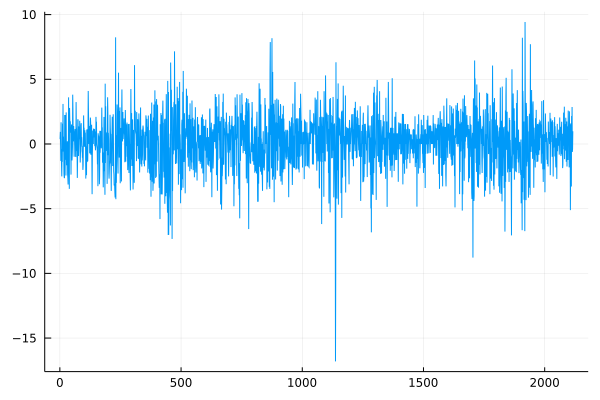

In [39]:
p1 = plot(y,legend=false)

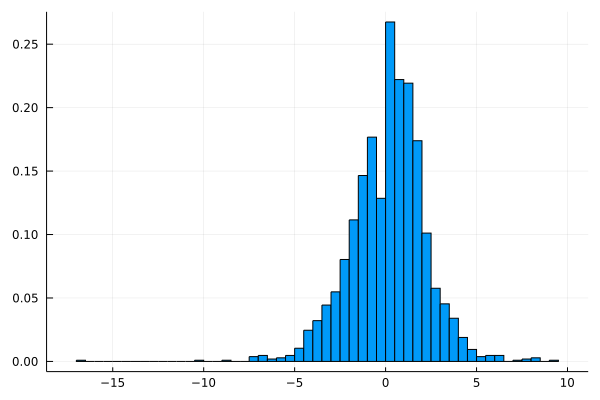

In [40]:
p2 = histogram(y, normed=true,legend=false)

In the first we clearly see volatility clusters, and in the second, we see
excess kurtosis, skew, and tails fatter than the normal distribution.

### ARCH

A basic ARCH specification is
\begin{align*}
y_{t} & =\mu+\rho y_{t-1}+\epsilon_{t}\\
 & \equiv g_{t}+\epsilon_{t}\\
\epsilon_{t} & =\sigma_{t}u_{t}\\
\sigma_{t}^{2} & =\omega+\sum_{i=1}^{q}\alpha_{i}\epsilon_{t-i}^{2}
\end{align*}
where the $u_{t}$ are Gaussian white noise shocks. The ARCH variance
is a moving average process. Previous large shocks to the series cause
the conditional variance of the series to increase. There is no leverage:
negative shocks have the same impact on the future variance as do
positive shocks.. 

- for $\sigma_{t}^{2}$ to be positive for all realizations of $\left\{ \epsilon_{t}\right\} $,
we need $\omega>0$, $\alpha_{i}\ge0$, $\forall i$.
- to ensure that the model is covariance stationary, we need $\sum_{i}\alpha_{i}<1$.
Otherwise, the variances will explode off to infinity.\newpage{}

Given that $\epsilon_{t}$ is normally distributed, to find the likelihood
in terms of the observable $y_{t}$ instead of the unobservable $\epsilon_{t}$,
first note that the series $u_{t}=\left(y_{t}-g_{t}\right)/\sigma_{t}=\frac{\epsilon_{t}}{\sigma_{t}}$
is iid Gaussian, so the likelihood is simply the product of standard
normal densities. 
\begin{eqnarray*}
u & \sim & N(0,I),\textrm{ so}\\
f(u) & = & \prod_{t=1}^{n}\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{u_{t}^{2}}{2}\right)
\end{eqnarray*}
 The joint density for $y$ can be constructed using a change of variables:


We have $u_{t}=\left(y_{t}-\mu-\rho y_{t-1}\right)/\sigma_{t}$, so
$\frac{\partial u_{t}}{\partial y_{t}}=\frac{1}{\sigma_{t}}$ and
$|\frac{\partial u}{\partial y^{\prime}}|=\prod_{t=1}^{n}\frac{1}{\sigma_{t}},$ 
\item doing a change of variables, 
$$
f(y;\theta)=\prod_{t=1}^{n}\frac{1}{\sqrt{2\pi}}\frac{1}{\sigma_{t}}\exp\left(-\frac{1}{2}\left(\frac{y_{t}-\mu-\rho y_{t-1}}{\sigma_{t}}\right)^{2}\right)
$$
where $\theta$ is the vector of all parameters (the parameters in
$g_{t}$, and the $\omega$ and alpha parameters of the ARCH specification.
Taking logs, 
$$
\ln L(\theta)=-n\ln\sqrt{2\pi}-\sum_{t=1}^{n}\ln\sigma_{t}-\frac{1}{2}\sum_{t=1}^{n}\left(\frac{y_{t}-\mu-\rho y_{t-1}}{\sigma_{t}}\right)^{2}.
$$


In principle, this is easy to maximize. Some complications
can arise when the restrictions for positivity and stationarity are
imposed. Consider a fairly short data series with low volatility in
the initial part, and high volatility at the end. This data appears
to have a nonstationary variance sequence. If one attempts to estimate
and ARCH model with stationarity imposed, the data and the restrictions
are saying two different things, which can make maximization of the
likelihood function difficult.

### GARCH

Note that an ARCH model specifies the variance process as a moving
average. For the same reason that an ARMA model may be used to parsimoniously
model a series instead of a high order AR or MA, one can do the same
thing for the variance series. A basic GARCH(p,q) specification is
\begin{align*}
y_{t} & =\mu+\rho y_{t-1}+\epsilon_{t}\\
\epsilon_{t} & =\sigma_{t}u_{t}\\
\sigma_{t}^{2} & =\omega+\sum_{i=1}^{q}\alpha_{i}\epsilon_{t-i}^{2}+\sum_{i=1}^{p}\beta_{i}\sigma_{t-i}^{2}
\end{align*}
The idea is that a GARCH model with low values of p and q may fit
the data as well or better than an ARCH model with large q.
\begin{itemize}
\item the model also requires restrictions for positive variance and stationarity,
which are:

- $\omega>0$
- $\alpha_{i}\ge0,\,i=1,...,q$ 
- $\beta_{i}\ge0,\,i=1,...,p$ 
- $\sum_{i=1}^{q}\alpha_{i}$+$\sum_{i=1}^{p}\beta_{i}<1$.


To estimate a GARCH model, you need to initialize $\sigma_{0}^{2}$
at some value. The sample unconditional variance is one possibility.
Another choice could be the sample variance of the initial elements
of the sequence. One can also ''backcast'' the conditional variance.

Notes:
- The GARCH model also requires restrictions on the parameters to ensure
stationarity and positivity of the variance. 
- A useful modification is the EGARCH model (exponential GARCH). This model treats the logarithm of the variance as an ARMA process, so the variance will be positive without restrictions on the parameters.
- There are many variants that introduce asymmetry (leverage) and non-normality.
- GARCH(1,1) is a highly popular model in financial analysis.

In [94]:
function garch11(theta, y)
    # dissect the parameter vector
    mu = theta[1]
    rho = theta[2]
    omega = theta[3]
    alpha = theta[4]
    beta = theta[5]
    resid = y[2:end] .- mu .- rho*y[1:end-1]
    n = size(resid,1)
    h = zeros(n)
    # initialize variance; either of these next two are reasonable choices
    h[1] = var(y[1:10])
    #h[1] = var(y)
    rsq = resid.^2.0
    for t = 2:n
        h[t] = omega + alpha*rsq[t-1] + beta*h[t-1]
    end
    logL = -log(sqrt(2.0*pi)) .- 0.5*log.(h) .- 0.5*rsq./h
end    

garch11 (generic function with 2 methods)

In [51]:
# Constrained maximization of logL
# note that the objective has a minus sign in front, as fmincon
# minimizes, but we want to maximize the logL
# get constrained estimates to use as input for MLE
thetastart = [mean(y); 0.0; var(y); 0.1; 0.1]
obj = theta -> -sum(garch11(theta, y))
thetahat, logL, junk  = fmincon(obj, thetastart, [], [], [-Inf, -1.0, 0.0, 0.0, 0.0], [Inf, 1.0, Inf, 1.0, 1.0])


([0.17509446603259488, -0.0017974081950996854, 0.1565082410267794, 0.11201475043965671, 0.8548995338432239], 4402.20524546603, :FTOL_REACHED)

In [99]:
model = θ -> garch11(θ, y)
avg_obj = θ -> -mean(vec(model(θ))) # average log likelihood
thetahat, objvalue, converged = fminunc(avg_obj, thetahat) # do the minimization of -logL

([0.17508640512522777, -0.0017962626843465643, 0.15648327135237008, 0.11200168690558754, 0.8549171874470727], 2.0814209196576132, true)

# Function Load:

In [55]:
function fminunc(obj, x; tol = 1e-10)
    results = Optim.optimize(obj, x, LBFGS(), 
                            Optim.Options(
                            g_tol = tol,
                            x_tol=tol,
                            f_tol=tol))
    return results.minimizer, results.minimum, Optim.converged(results)
    #xopt, objvalue, flag = fmincon(obj, x, tol=tol)
    #return xopt, objvalue, flag
end

fminunc (generic function with 1 method)

In [46]:
function fmincon(obj, startval, R=[], r=[], lb=[], ub=[]; tol = 1e-10, iterlim=0)
    # the objective is an anonymous function
    function objective_function(x::Vector{Float64}, grad::Vector{Float64})
        obj_func_value = obj(x)[1,1]
        return(obj_func_value)
    end
    # impose the linear restrictions
    function constraint_function(x::Vector, grad::Vector, R, r)
        result = R*x .- r
        return result[1,1]
    end
    opt = Opt(:LN_COBYLA, size(startval,1))
    min_objective!(opt, objective_function)
    # impose lower and/or upper bounds
    if lb != [] lower_bounds!(opt, lb) end
    if ub != [] upper_bounds!(opt, ub) end
    # impose linear restrictions, by looping over the rows
    if R != []
        for i = 1:size(R,1)
            equality_constraint!(opt, (theta, g) -> constraint_function(theta, g, R[i:i,:], r[i]), tol)
        end
    end    
    xtol_rel!(opt, tol)
    ftol_rel!(opt, tol)
    maxeval!(opt, iterlim)
    (objvalue, xopt, flag) = NLopt.optimize(opt, startval)
    return xopt, objvalue, flag
end

fmincon (generic function with 5 methods)